In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# if you edit the function you need to run these lines again otherwise it won't be updated in this notebook
import importlib, plotting_functions
importlib.reload(plotting_functions) 
from plotting_functions import plot_opinions, plot_opinion_change

In [76]:
# for a in agents:
def one_step(index, agent, agents, advertisers, R):
    
    if advertisers is None:
        total = agents
    else:
        total = np.concatenate((agents, advertisers))

    selected = np.where(np.abs(total - agent) <= R)[0]
    update = np.average(total[selected])
    
    return update

def poll_step(index, agent, agents, advertisers, R):

    if advertisers is None:
        total = np.delete(agents, index)
    else:
        total = np.concatenate((np.delete(agents, index), advertisers)) #agents and advertisers with current agent removed
        
    poll = np.round(total, 1)
    selected = np.where(np.abs(poll - agent) <= R)[0]
    update = np.average(np.append(poll[selected], agent))

    return update

def constant_advertising(agents, advertisers, target):
    return advertisers

def targeted_advertising(agents, advertisers, target):
    
    delta = 0.2
    m = len(advertisers) #number of advertisers
    mean = np.mean(agents)
    print(mean)

    if mean < target:
        new_advertisers = np.linspace(mean, min(mean + delta, 1), m) 
        print('lower', mean, 'upper', min(mean + delta, 1))
    elif mean > target:
        new_advertisers = np.linspace(max(mean - delta, 0), mean, m) 
        print('lower', max(mean - delta, 0), 'upper', mean)
    else:
        new_advertisers = advertisers

    return new_advertisers



In [66]:

def opinion_model(agents, R, rounds, advertisers=None, advert_strat=None, update_func = one_step, target=0.2):

    #number of agents
    n = len(agents)

    #initialize array to store opinions over time
    agents_history = np.zeros((rounds + 1, n))
    agents_history[0, :] = agents

    #do t time steps (main loop)
    for r in range(rounds):

        #make a temp list of agents
        agents_next = np.zeros(n)

        #loop over all agents
        for i, a in enumerate(agents):
            agents_next[i] = update_func(i, a, agents, advertisers, R)

        if advertisers is not None:
            advertisers = advert_strat(agents, advertisers, target)

        #update the agents list
        agents = np.copy(agents_next)
        agents_history[r + 1, :] = agents

    return agents, agents_history
 

In [78]:
# set initial opinions 
n = 1000 #number of agents
agents = np.random.uniform(0, 1, n)
m = 500 #number of advertisers
advertisers = np.random.uniform(0.45, 0.55, m)
rounds = 10

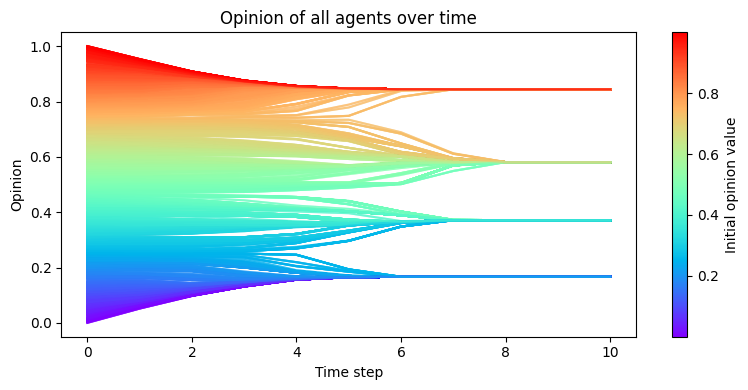

In [80]:
#apply model with one step
agents_1, agents_history_1 = opinion_model(agents = agents, R = 0.1, rounds = rounds, advertisers = None, update_func = one_step)

#plot model
plot_opinions(agents_history_1, agents_history_1[0, :], rounds = 10, alpha=0.6)



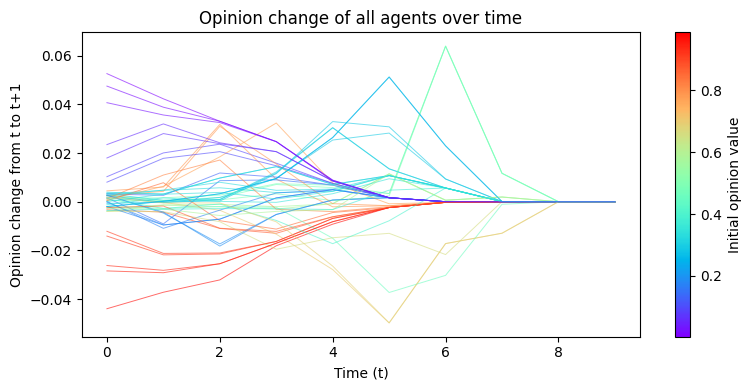

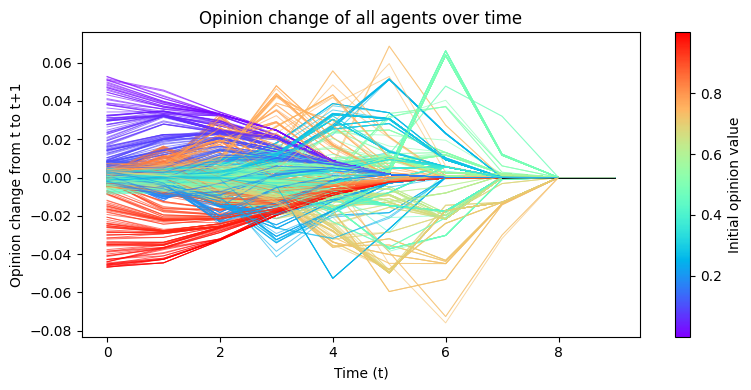

In [81]:
#plotting change
plot_opinion_change(agents_history_1[:, ::20], agents_history_1[0, ::20], rounds, alpha=0.6)
plot_opinion_change(agents_history_1, agents_history_1[0, :], rounds, alpha=0.6)

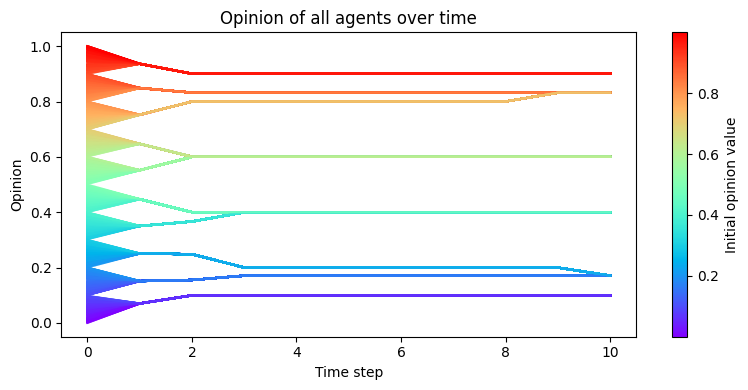

In [82]:
#apply model with polling
agents_1, agents_history_1 = opinion_model(agents = agents, R = 0.1, rounds = rounds, advertisers = None, update_func = poll_step)

#plot model
plot_opinions(agents_history_1, agents_history_1[0, :], rounds, alpha=0.6)

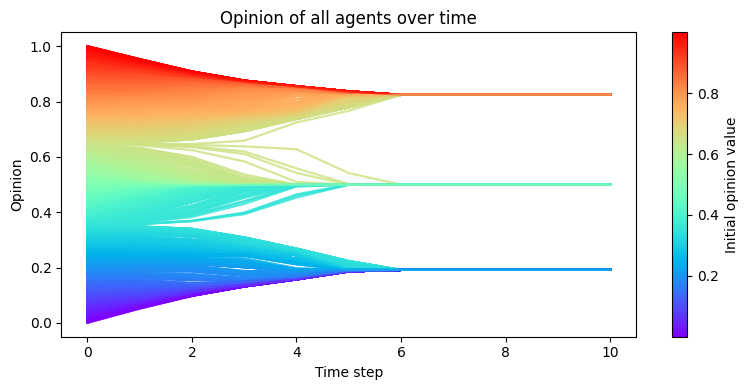

In [83]:
#apply model with one step & advertisers
agents_1, agents_history_1 = opinion_model(agents = agents, R = 0.1, rounds = rounds, advertisers = advertisers, advert_strat=constant_advertising, update_func = one_step)

#plot model
plot_opinions(agents_history_1, agents_history_1[0, :], rounds = 10, alpha=0.6)

0.49826966192569017
lower 0.49826966192569017 upper 0.6982696619256902
0.49863528651442074
lower 0.49863528651442074 upper 0.6986352865144208
0.5008435745635329
lower 0.3008435745635329 upper 0.5008435745635329
0.5023584567075161
lower 0.3023584567075161 upper 0.5023584567075161
0.4994111692521977
lower 0.4994111692521977 upper 0.6994111692521977
0.4952543328321769
lower 0.4952543328321769 upper 0.695254332832177
0.5006044650910112
lower 0.3006044650910112 upper 0.5006044650910112
0.5048478710184822
lower 0.30484787101848215 upper 0.5048478710184822
0.501573735355285
lower 0.30157373535528503 upper 0.501573735355285
0.49612995163043844
lower 0.49612995163043844 upper 0.6961299516304384
0.489345573319613
lower 0.489345573319613 upper 0.689345573319613
0.49654030866416315
lower 0.49654030866416315 upper 0.6965403086641632
0.5022890169181691
lower 0.30228901691816906 upper 0.5022890169181691
0.507494717362938
lower 0.30749471736293804 upper 0.507494717362938
0.5012126871824945
lower 0.301

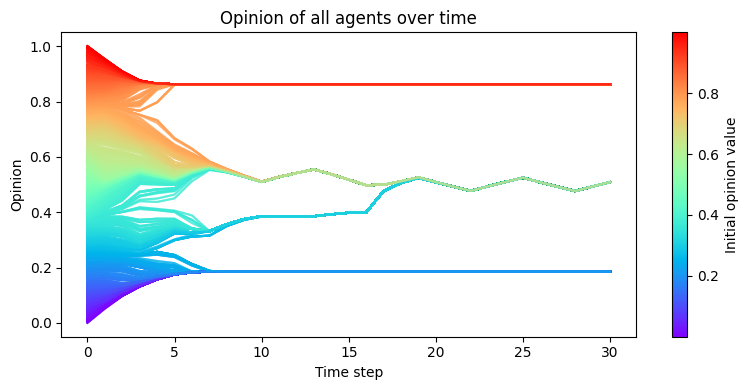

In [99]:
#apply model with one step & advertisers & target advertising
agents_1, agents_history_1 = opinion_model(agents = agents, R = 0.1, rounds = 30, advertisers = advertisers, advert_strat=targeted_advertising, update_func = one_step, target = 0.5)

#plot model
plot_opinions(agents_history_1, agents_history_1[0, :], rounds = 30, alpha=0.6)

## Apply to current dataset

In [ ]:
#import data 
data = pd.read_csv("anes_timeseries_2024_csv_20250808/anes_timeseries_2024_csv_20250808.csv", usecols = ['V241177'])

#filter data to remove votes corresponding to abstaining or errors
remove = [-9, -4, 99] # "Refused", "Error", "Havent thought much about this"
filtered = data[~data['V241177'].isin(remove)]
removed = data[data['V241177'].isin(remove)]

#convert to array
poll = filtered['V241177'].to_numpy()
normalized = (poll - 1) / 6

In [17]:
#advertisers
m = 150 #number of advertisers
advertisers = np.random.uniform(0, 0.3, m)

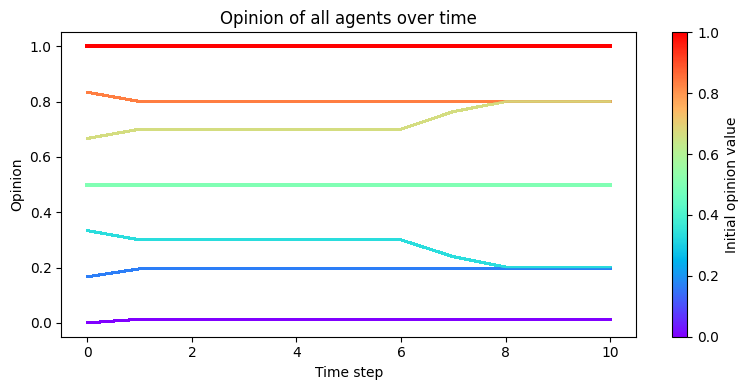

In [18]:
#apply model with one step & advertisers
agents_3, agents_history_3 = opinion_model(agents = normalized, R = 0.1, rounds = rounds, advertisers = advertisers, update_func = poll_step)

#plot model
plot_opinions(agents_history_3, agents_history_3[0, :], rounds = 10, alpha=0.6)